<a href="https://colab.research.google.com/github/haarisss/reinforcement-learning/blob/main/DELE_CA2_Part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HAARIS BIN SULAIMAN(P2112815) LEE KOK JENG(P2112985) LUNAR LANDER PROJECT FOR REINFORCEMENT LEARNING

## Method 3 (colab gymrender)

### Installs Required

In [ ]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for colabgymrender: filename=colabgymrender-1.1.0-py3-none-any.whl size=3130 sha256=856445f57b69fc643b83aa1ccbb702bb981e170368c4f8eec1a5d1f7b9f7871a
  Stored in directory: /root/.cache/pip/wheels/e4/d2/e1/cc1c940178ad92438325422b51c3e8c3d927b9ef8381da8840
Successfully built colabgymrender


In [ ]:
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 59.2 MB/s eta 0:00:00


In [ ]:
!pip3 install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 86.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=13a76153dcd1c4b15db2a0c8bd8a693118aa3d764298926d67f0821f6ba74f4e
  Stored in directory: /root/.cache/pip/wheels/be/7b/04/4d8d56f1d503e5c404f0de6018c0cfa592c71588a39b49e002
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [ ]:
!pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
  Running setup.py install for box2d-py ... done
  DEPRECATION: box2d-py was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https:

In [ ]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 41.9 MB/s eta 0:00:00


In [ ]:
  !pip install pyvirtualdisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [ ]:
import pyvirtualdisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
!pip install pywin32
!pip install pyopengl
!pip install pyglet==1.5.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pywin32 (from versions: none)
ERROR: No matching distribution found for pywin32
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.5 MB/s eta 0:00:00


# Baseline(First Test)

### Import Modules

In [ ]:
import random
import gym
import math
import numpy as np
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


### DQN

In [ ]:
EPOCHS = 1000
# EPOCHS = 50
THRESHOLD = 75
MONITOR = True

In [ ]:
class DQN():
    def __init__(self, env_string,batch_size=64):
        self.memory = deque(maxlen=100000)
        self.env = gym.make(env_string)
        input_size = self.env.observation_space.shape[0]
        action_size = self.env.action_space.n
        self.batch_size = batch_size
        self.gamma = 1.0
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995

        alpha=0.01
        alpha_decay=0.01
        from gym.wrappers.record_video import RecordVideo
        if MONITOR: self.env = RecordVideo(self.env, './'+env_string, episode_trigger = lambda x: x % 10 == 0)

        # Init model
        self.model = Sequential()
        self.model.add(Dense(24, input_dim=input_size, activation='tanh'))
        self.model.add(Dense(48, activation='tanh'))
        self.model.add(Dense(action_size, activation='linear'))
        self.model.compile(loss='mse', optimizer=Adam(lr=alpha, decay=alpha_decay))

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def choose_action(self, state, epsilon):
        if np.random.random() <= epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.model.predict(state))

    def preprocess_state(self, state):
        return np.reshape(state, [1, 8])

    def replay(self, batch_size):
        x_batch, y_batch = [], []
        minibatch = random.sample(self.memory, min(len(self.memory), batch_size))
        for state, action, reward, next_state, done in minibatch:
            y_target = self.model.predict(state)
            y_target[0][action] = reward if done else reward + self.gamma * np.max(self.model.predict(next_state)[0])
            x_batch.append(state[0])
            y_batch.append(y_target[0])

        self.model.fit(np.array(x_batch), np.array(y_batch), batch_size=len(x_batch), verbose=0)
        #epsilon = max(epsilon_min, epsilon_decay*epsilon) # decrease epsilon


    def train(self):
        scores = deque(maxlen=100)
        avg_scores = []


        for e in range(EPOCHS):
            state = self.env.reset()
            state = self.preprocess_state(state)
            done = False
            i = 0
            while not done:
                action = self.choose_action(state,self.epsilon)
                next_state, reward, done, _ = self.env.step(action)
                next_state = self.preprocess_state(next_state)
                self.remember(state, action, reward, next_state, done)
                state = next_state
                self.epsilon = max(self.epsilon_min, self.epsilon_decay*self.epsilon) # decrease epsilon
                i += 1

            scores.append(i)
            mean_score = np.mean(scores)
            avg_scores.append(mean_score)
            if mean_score >= THRESHOLD and e >= 100:
                print('Ran {} episodes. Solved after {} trials ✔'.format(e, e - 100))
                return avg_scores
            if e % 100 == 0:
                print('[Episode {}] - Mean survival time over last 100 episodes was {} ticks.'.format(e, mean_score))

            self.replay(self.batch_size)

        print('Did not solve after {} episodes 😞'.format(e))
        return avg_scores


### Agent Train

In [ ]:
env_string = 'LunarLander-v2'
agent = DQN(env_string)
scores = agent.train()

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is

1/1 [==============================] - 0s 12ms/step
[Episode 0] - Mean survival time over last 100 episodes was 102.0 ticks.
1/1 [==============================] - 0s 16ms/step


/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 15ms/step


/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 15ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 16ms/step


/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 15ms/step


/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 14ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 16ms/step


/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 15ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 15ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 14ms/step
[Episode 100] - Mean survival time over last 100 episodes was 70.05 ticks.
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


1/1 [==============================] - 0s 14ms/step


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 19ms/step
Ran 122 episodes. Solved after 22 trials ✔


In [ ]:
agent.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                216       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 4)                 196       
                                                                 
Total params: 1,612
Trainable params: 1,612
Non-trainable params: 0
_________________________________________________________________


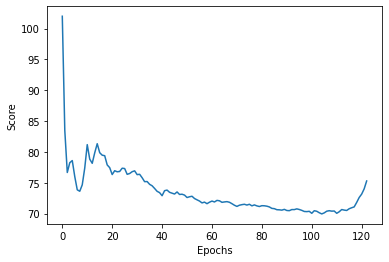

In [ ]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.show()

Correction to name cause the graph to change, original:


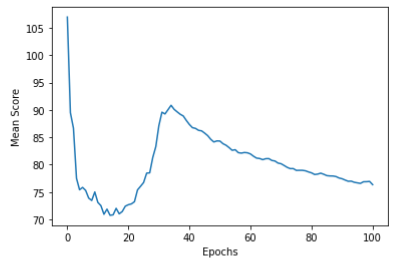


## Videos

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('LunarLander-v2/rl-video-episode-0.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('LunarLander-v2/rl-video-episode-10.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('LunarLander-v2/rl-video-episode-20.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('LunarLander-v2/rl-video-episode-30.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('LunarLander-v2/rl-video-episode-40.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('LunarLander-v2/rl-video-episode-50.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('LunarLander-v2/rl-video-episode-60.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('LunarLander-v2/rl-video-episode-70.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('LunarLander-v2/rl-video-episode-80.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('LunarLander-v2/rl-video-episode-90.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Model Improvement

# Improved Model

## Importing modules

In [ ]:
import gym
import numpy as np
import pandas as pd
from collections import deque
import random

from keras import Sequential
from keras.layers import Dense
from keras.activations import relu, linear
from keras.optimizers import Adam
from keras.losses import mean_squared_error
from keras.models import load_model


import pickle
from matplotlib import pyplot as plt

## Defining model

In [ ]:
class DQN:
    def __init__(self, env, lr, gamma, epsilon, epsilon_decay):

        self.env = env
        self.action_space = env.action_space
        self.observation_space = env.observation_space
        self.counter = 0

        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.rewards_list = []

        self.replay_memory_buffer = deque(maxlen=500000)
        self.batch_size = 64
        self.epsilon_min = 0.01
        self.num_action_space = self.action_space.n
        self.num_observation_space = env.observation_space.shape[0]
        self.model = self.initialize_model()

    def initialize_model(self):
        model = Sequential()
        model.add(Dense(512, input_dim=self.num_observation_space, activation=relu))
        model.add(Dense(256, activation=relu))
        model.add(Dense(self.num_action_space, activation=linear))

        # Compile the model
        model.compile(loss=mean_squared_error,optimizer=Adam(lr=self.lr))
        print(model.summary())
        return model

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            return random.randrange(self.num_action_space)

        predicted_actions = self.model.predict(state)
        return np.argmax(predicted_actions[0])

    def add_to_replay_memory(self, state, action, reward, next_state, done):
        self.replay_memory_buffer.append((state, action, reward, next_state, done))

    def learn_and_update_weights_by_reply(self):

        # replay_memory_buffer size check
        if len(self.replay_memory_buffer) < self.batch_size or self.counter != 0:
            return

        # Early Stopping
        if np.mean(self.rewards_list[-10:]) > 180:
            return

        random_sample = self.get_random_sample_from_replay_mem()
        states, actions, rewards, next_states, done_list = self.get_attribues_from_sample(random_sample)
        targets = rewards + self.gamma * (np.amax(self.model.predict_on_batch(next_states), axis=1)) * (1 - done_list)
        target_vec = self.model.predict_on_batch(states)
        indexes = np.array([i for i in range(self.batch_size)])
        target_vec[[indexes], [actions]] = targets

        self.model.fit(states, target_vec, epochs=1, verbose=0)

    def get_attribues_from_sample(self, random_sample):
        states = np.array([i[0] for i in random_sample])
        actions = np.array([i[1] for i in random_sample])
        rewards = np.array([i[2] for i in random_sample])
        next_states = np.array([i[3] for i in random_sample])
        done_list = np.array([i[4] for i in random_sample])
        states = np.squeeze(states)
        next_states = np.squeeze(next_states)
        return np.squeeze(states), actions, rewards, next_states, done_list

    def get_random_sample_from_replay_mem(self):
        random_sample = random.sample(self.replay_memory_buffer, self.batch_size)
        return random_sample

    def train(self, num_episodes, can_stop=True):
        for episode in range(num_episodes):
            state = env.reset()
            reward_for_episode = 0
            num_steps = 1000
            state = np.reshape(state, [1, self.num_observation_space])
            for step in range(num_steps):
                # env.render()
                received_action = self.get_action(state)
                # print("received_action:", received_action)
                next_state, reward, done, info = env.step(received_action)
                next_state = np.reshape(next_state, [1, self.num_observation_space])
                # Store the experience in replay memory
                self.add_to_replay_memory(state, received_action, reward, next_state, done)
                # add up rewards
                reward_for_episode += reward
                state = next_state
                self.update_counter()
                self.learn_and_update_weights_by_reply()

                if done:
                    break
            self.rewards_list.append(reward_for_episode)

            # Decay the epsilon after each experience completion
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

            # Check for breaking condition
            last_rewards_mean = np.mean(self.rewards_list[-100:])
            if last_rewards_mean > 200 and can_stop:
                print("DQN Training Complete...")
                break
            print(episode, "\t: Episode || Reward: ",reward_for_episode, "\t|| Average Reward: ",last_rewards_mean, "\t epsilon: ", self.epsilon )

    def update_counter(self):
        self.counter += 1
        step_size = 5
        self.counter = self.counter % step_size

    def save(self, name):
        self.model.save(name)


## Implementing Early stopping

Instead of letting the model train until thousands of episodes. we set an early stopping condition whereby the model stops training when the average reward for the last 100 episodes is more than 200.

# Hyperparameter tuning

In [ ]:
def plot_experiments(df, chart_name, title, x_axis_label, y_axis_label, y_limit):
    plt.rcParams.update({'font.size': 17})
    plt.figure(figsize=(15, 8))
    plt.close()
    plt.figure()
    plot = df.plot(linewidth=1, figsize=(15, 8), title=title)
    plot.set_xlabel(x_axis_label)
    plot.set_ylabel(y_axis_label)
    plt.ylim(y_limit)
    fig = plot.get_figure()
    fig.savefig(chart_name)


## Learning Rate

In [ ]:
def run_experiment_for_lr():
    print('Running Experiment for learning rate...')
    env = gym.make('LunarLander-v2')

    # set seeds
    env.seed(21)
    np.random.seed(21)

    # setting up params
    lr_values = [0.0001, 0.001, 0.01, 0.1]
    epsilon = 1.0
    epsilon_decay = 0.995
    gamma = 0.99
    training_episodes = 150
    rewards_list_for_lrs = []
    for lr_value in lr_values:
        model = DQN(env, lr_value, gamma, epsilon, epsilon_decay)
        print("Training model for LR: {}".format(lr_value))
        model.train(training_episodes, False)
        rewards_list_for_lrs.append(model.rewards_list)

    pickle.dump(rewards_list_for_lrs, open("rewards_list_for_lrs.p", "wb"))
    rewards_list_for_lrs = pickle.load(open("rewards_list_for_lrs.p", "rb"))

    lr_rewards_pd = pd.DataFrame(index=pd.Series(range(1, training_episodes + 1)))
    for i in range(len(lr_values)):
        col_name = "lr="+ str(lr_values[i])
        lr_rewards_pd[col_name] = rewards_list_for_lrs[i]
    plot_experiments(lr_rewards_pd, "Figure 3: Rewards per episode for different learning rates", "Figure 3: Rewards per episode for different learning rates", "Episodes", "Reward", (-2000, 300))



Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 13ms/step
84 	: Episode || Reward:  -144.87553027294967 	|| Average Reward:  -170.4121108193959 	 epsilon:  0.653073201944699
1/1 [==============================] - 0s 14ms/step
85 	: Episode || Reward:  -21.35576936348906 	|| Average Reward:  -168.6788975466528 	 epsilon:  0.6498078359349755
1/1 [==============================] - 0s 12ms/step
86 	: Episode || Reward:  -257.87485350686006 	|| Average Reward:  -169.70413841975864 	 epsilon:  0.6465587967553006
1/1 [==============================] - 0s 13ms/step
87 	: Episode || Reward:  -273.79579587607225 	|| Average Reward:  -170.8869981635804 	 epsilon:  0.6433260027715241
1/1 [==============================] - 0s 13ms/step
88 	: Episode || Reward:  -54.282341353223984 	|| Average Reward:  -169.57683348031796 	 epsilon:  0.6401093727576664
1/1 [==============================] - 0s 16ms/step
89 	: Episode || Reward:  -267.251358157814 	|| Aver

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 13ms/step
46 	: Episode || Reward:  -288.00748269809264 	|| Average Reward:  -203.18414337308295 	 epsilon:  0.7901049725470279
1/1 [==============================] - 0s 13ms/step
47 	: Episode || Reward:  -349.2458131241117 	|| Average Reward:  -206.22709482622943 	 epsilon:  0.7861544476842928
1/1 [==============================] - 0s 14ms/step
48 	: Episode || Reward:  -67.7084604393543 	|| Average Reward:  -203.40018392037487 	 epsilon:  0.7822236754458713
1/1 [==============================] - 0s 13ms/step
49 	: Episode || Reward:  -92.1279762486167 	|| Average Reward:  -201.17473976693972 	 epsilon:  0.778312557068642
1/1 [==============================] - 0s 13ms/step
50 	: Episode || Reward:  -182.66499724625277 	|| Average Reward:  -200.8118036390831 	 epsilon:  0.7744209942832988
1/1 [==============================] - 0s 16ms/step
51 	: Episode || Reward:  -282.73010834202387 	|| Aver

<Figure size 432x288 with 0 Axes>

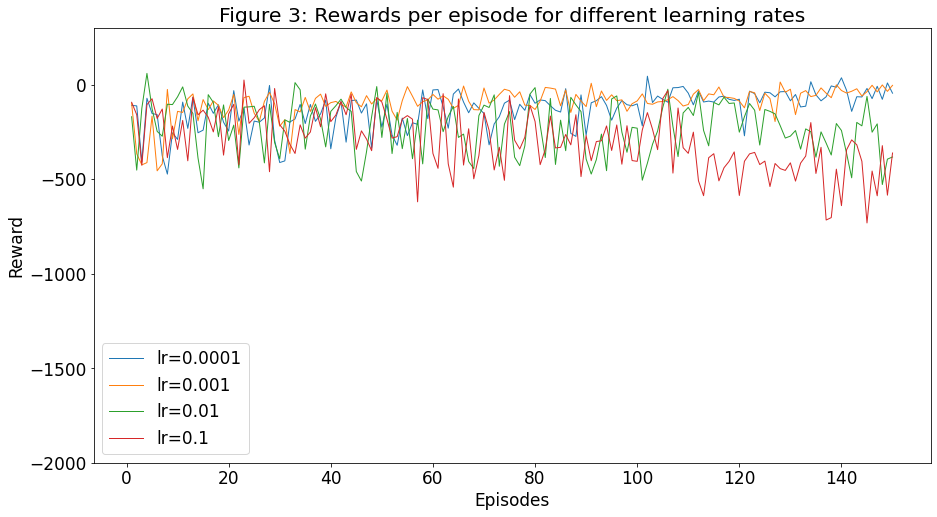

In [ ]:
env = gym.make('LunarLander-v2')
env.seed(21)
np.random.seed(21)
run_experiment_for_lr()

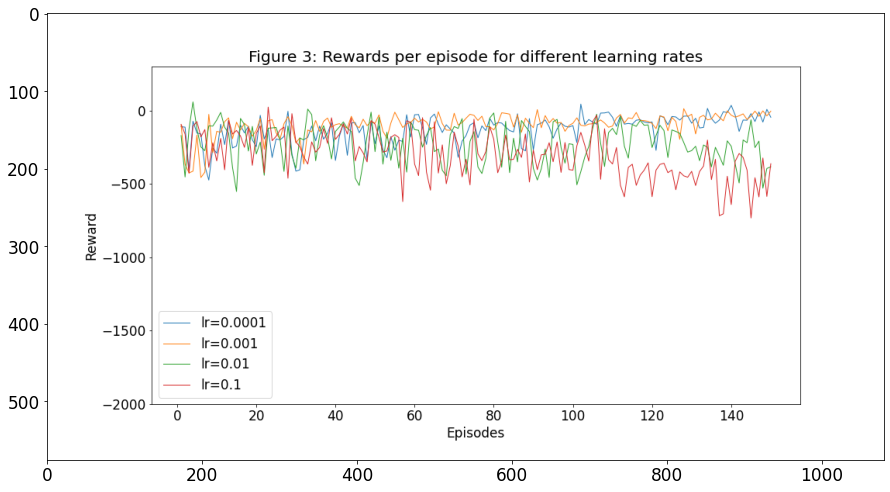

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = "Figure 3: Rewards per episode for different learning rates.png"
image = mpimg.imread(image_path)
plt.figure(figsize=(15, 12))
plt.imshow(image)
plt.show()

Best learning rate: 0.001

## Gamma

In [ ]:
def run_experiment_for_gamma():
    print('Running Experiment for gamma...')
    env = gym.make('LunarLander-v2')

    # set seeds
    env.seed(21)
    np.random.seed(21)

    # setting up params
    lr = 0.001
    epsilon = 1.0
    epsilon_decay = 0.995
    gamma_list = [0.99, 0.9, 0.8, 0.7]
    training_episodes = 150

    rewards_list_for_gammas = []
    for gamma_value in gamma_list:
        # save_dir = "hp_gamma_"+ str(gamma_value) + "_"
        model = DQN(env, lr, gamma_value, epsilon, epsilon_decay)
        print("Training model for Gamma: {}".format(gamma_value))
        model.train(training_episodes, False)
        rewards_list_for_gammas.append(model.rewards_list)

    pickle.dump(rewards_list_for_gammas, open("rewards_list_for_gammas.p", "wb"))
    rewards_list_for_gammas = pickle.load(open("rewards_list_for_gammas.p", "rb"))

    gamma_rewards_pd = pd.DataFrame(index=pd.Series(range(1, training_episodes + 1)))
    for i in range(len(gamma_list)):
        col_name = "gamma=" + str(gamma_list[i])
        gamma_rewards_pd[col_name] = rewards_list_for_gammas[i]
    plot_experiments(gamma_rewards_pd, "Figure 4: Rewards per episode for different gamma values",
                     "Figure 4: Rewards per episode for different gamma values", "Episodes", "Reward", (-600, 300))


Running Experiment for gamma...
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               4608      
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dense_20 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 136,964
Trainable params: 136,964
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 15ms/step
90 	: Episode || Reward:  -94.7400625006967 	|| Average Reward:  -148.32833398104376 	 epsilon:  0.6337242817644086
1/1 [==============================] - 0s 14ms/step
91 	: Episode || Reward:  -136.9023144903948 	|| Average Reward:  -148.20413811701496 	 epsilon:  0.6305556603555866
1/1 [==============================] - 0s 15ms/step
92 	: Episode || Reward:  -92.4498079367066 	|| Average Reward:  -147.60462919034498 	 epsilon:  0.6274028820538087
1/1 [==============================] - 0s 14ms/step
93 	: Episode || Reward:  -135.48055071028517 	|| Average Reward:  -147.47564963204647 	 epsilon:  0.6242658676435396
1/1 [==============================] - 0s 13ms/step
94 	: Episode || Reward:  -80.28622685286226 	|| Average Reward:  -146.7683925501603 	 epsilon:  0.6211445383053219
1/1 [==============================] - 0s 14ms/step
95 	: Episode || Reward:  -102.95821294891729 	|| Aver

<Figure size 432x288 with 0 Axes>

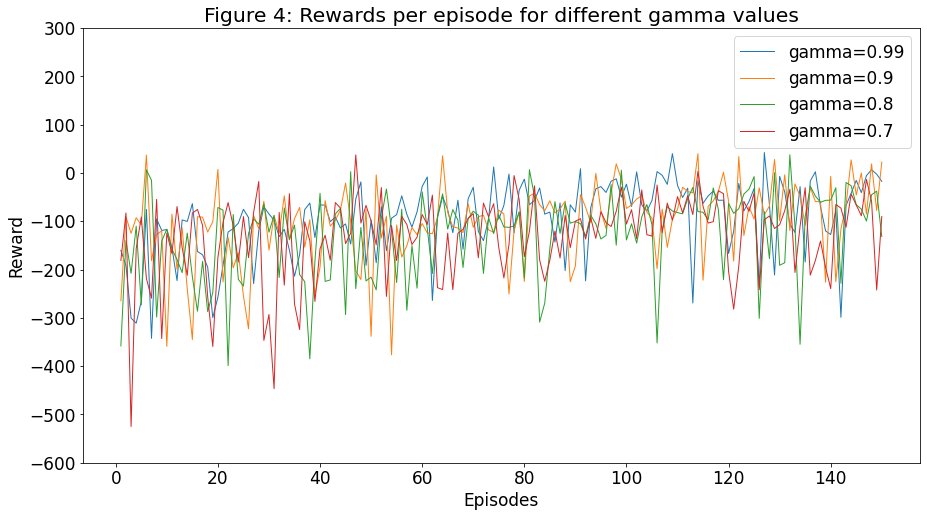

In [ ]:
env = gym.make('LunarLander-v2')
env.seed(21)
np.random.seed(21)
run_experiment_for_gamma()

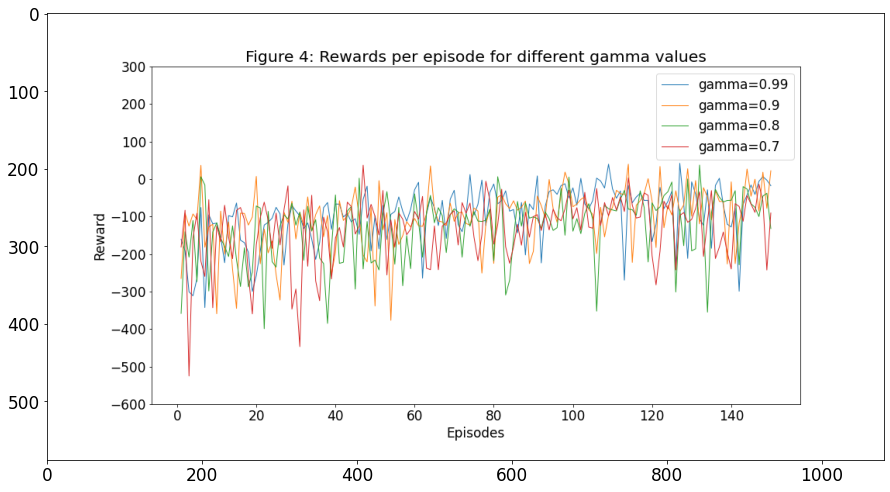

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = "Figure 4: Rewards per episode for different gamma values.png"
image = mpimg.imread(image_path)
plt.figure(figsize=(15, 12))
plt.imshow(image)
plt.show()

Best gamma: 0.99

## Epsilon Decay

In [ ]:
def run_experiment_for_ed():
    print('Running Experiment for epsilon decay...')
    env = gym.make('LunarLander-v2')

    # set seeds
    env.seed(21)
    np.random.seed(21)

    # setting up params
    lr = 0.001
    epsilon = 1.0
    ed_values = [0.999, 0.995, 0.990, 0.9]
    gamma = 0.99
    training_episodes = 100

    rewards_list_for_ed = []
    for ed in ed_values:
        save_dir = "hp_ed_"+ str(ed) + "_"
        model = DQN(env, lr, gamma, epsilon, ed)
        print("Training model for ED: {}".format(ed))
        model.train(training_episodes, False)
        rewards_list_for_ed.append(model.rewards_list)

    pickle.dump(rewards_list_for_ed, open("rewards_list_for_ed.p", "wb"))
    rewards_list_for_ed = pickle.load(open("rewards_list_for_ed.p", "rb"))

    ed_rewards_pd = pd.DataFrame(index=pd.Series(range(1, training_episodes+1)))
    for i in range(len(ed_values)):
        col_name = "epsilon_decay = "+ str(ed_values[i])
        ed_rewards_pd[col_name] = rewards_list_for_ed[i]
    plot_experiments(ed_rewards_pd, "Figure 5: Rewards per episode for different epsilon(ε) decay", "Figure 5: Rewards per episode for different epsilon(ε) decay values", "Episodes", "Reward", (-600, 300))


Running Experiment for epsilon decay...
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               4608      
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 136,964
Trainable params: 136,964
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self

None
Training model for ED: 0.999
0 	: Episode || Reward:  -180.23621028783742 	|| Average Reward:  -180.23621028783742 	 epsilon:  0.999
1 	: Episode || Reward:  -332.8264454714197 	|| Average Reward:  -256.5313278796285 	 epsilon:  0.998001
2 	: Episode || Reward:  -32.8898383867929 	|| Average Reward:  -181.98416471534998 	 epsilon:  0.997002999
3 	: Episode || Reward:  -74.47681309482975 	|| Average Reward:  -155.10732681021992 	 epsilon:  0.996005996001
4 	: Episode || Reward:  -54.585504974593476 	|| Average Reward:  -135.00296244309465 	 epsilon:  0.995009990004999
5 	: Episode || Reward:  -118.93024105743125 	|| Average Reward:  -132.32417554548405 	 epsilon:  0.994014980014994
1/1 [==============================] - 0s 44ms/step
6 	: Episode || Reward:  -255.47432850824444 	|| Average Reward:  -149.91705454016412 	 epsilon:  0.993020965034979
1/1 [==============================] - 0s 17ms/step
7 	: Episode || Reward:  -116.0393691469938 	|| Average Reward:  -145.68234386601785 

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 16ms/step
91 	: Episode || Reward:  18.17902189514036 	|| Average Reward:  -108.10520880174273 	 epsilon:  0.009697737297875247
1/1 [==============================] - 0s 17ms/step
92 	: Episode || Reward:  -86.20254678540037 	|| Average Reward:  -107.86969630694335 	 epsilon:  0.009697737297875247
1/1 [==============================] - 0s 15ms/step
93 	: Episode || Reward:  -106.52598086138815 	|| Average Reward:  -107.85540146177787 	 epsilon:  0.009697737297875247
1/1 [==============================] - 0s 20ms/step
94 	: Episode || Reward:  15.61257495254053 	|| Average Reward:  -106.55573855215347 	 epsilon:  0.009697737297875247
1/1 [==============================] - 0s 16ms/step
95 	: Episode || Reward:  -6.280023955674512 	|| Average Reward:  -105.51119985844015 	 epsilon:  0.009697737297875247
1/1 [==============================] - 0s 21ms/step
96 	: Episode || Reward:  -380.336533130058

<Figure size 432x288 with 0 Axes>

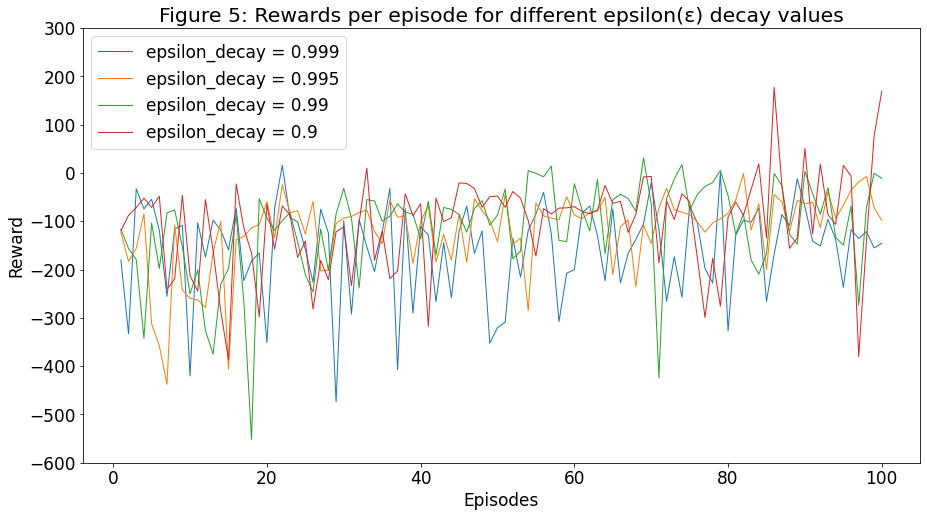

In [ ]:
env = gym.make('LunarLander-v2')
env.seed(21)
np.random.seed(21)
run_experiment_for_ed()

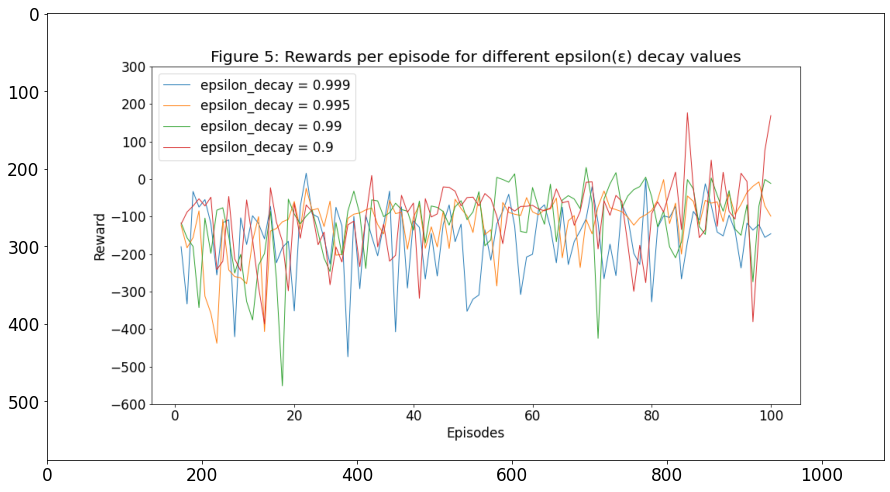

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = "Figure 5: Rewards per episode for different epsilon(ε) decay.png"
image = mpimg.imread(image_path)
plt.figure(figsize=(15, 12))
plt.imshow(image)
plt.show()

Best epsilon decay: 0.9

# Training model with best params

In [ ]:
if __name__ == '__main__':
    env = gym.make('LunarLander-v2')
    # env.reset()
    # from gym.wrappers.record_video import RecordVideo
    # env = gym.wrappers.RecordVideo(env, './LunarTrain', episode_trigger = lambda x: x % 10 == 0)
    # set seeds
    env.seed(21)
    np.random.seed(21)

    # setting up params
    lr = 0.001
    epsilon = 1.0
    epsilon_decay = 0.9
    gamma = 0.99
    training_episodes = 600
    model = DQN(env, lr, gamma, epsilon, epsilon_decay)
    model.train(training_episodes, True)

# ... Define a model

    # Save Everything
    save_dir = "saved_models"
    # Save trained model
    model.save(save_dir + "trained_model.h5")

    # Save Rewards list
    pickle.dump(model.rewards_list, open(save_dir + "train_rewards_list.p", "wb"))
    rewards_list = pickle.load(open(save_dir + "train_rewards_list.p", "rb"))

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 136,964
Trainable params: 136,964
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 14ms/step
314 	: Episode || Reward:  183.57957353164426 	|| Average Reward:  190.81681322831565 	 epsilon:  0.009697737297875247
1/1 [==============================] - 0s 15ms/step
315 	: Episode || Reward:  248.21434478662525 	|| Average Reward:  191.19699707893545 	 epsilon:  0.009697737297875247
1/1 [==============================] - 0s 17ms/step
316 	: Episode || Reward:  224.59893364839633 	|| Average Reward:  190.86975819898555 	 epsilon:  0.009697737297875247
1/1 [==============================] - 0s 15ms/step
317 	: Episode || Reward:  180.2304281902239 	|| Average Reward:  191.16837289790806 	 epsilon:  0.009697737297875247
1/1 [==============================] - 0s 20ms/step
318 	: Episode || Reward:  272.85670455759896 	|| Average Reward:  193.91888023227008 	 epsilon:  0.009697737297875247
1/1 [==============================] - 0s 15ms/step
319 	: Episode || Reward:  262.139800780401

Training stops after episode 324

In [ ]:
def plot_df(df, chart_name, title, x_axis_label, y_axis_label):
    plt.rcParams.update({'font.size': 17})
    df['rolling_mean'] = df[df.columns[0]].rolling(100).mean()
    plt.figure(figsize=(15, 8))
    plt.close()
    plt.figure()
    # plot = df.plot(linewidth=1.5, figsize=(15, 8), title=title)
    plot = df.plot(linewidth=1.5, figsize=(15, 8))
    plot.set_xlabel(x_axis_label)
    plot.set_ylabel(y_axis_label)
    # plt.ylim((-400, 300))
    fig = plot.get_figure()
    plt.legend().set_visible(False)
    fig.savefig(chart_name)


<Figure size 432x288 with 0 Axes>

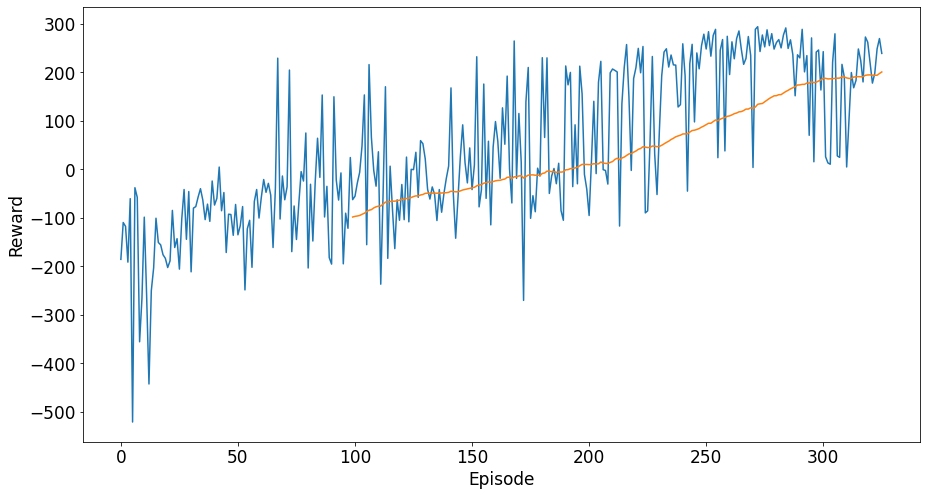

In [ ]:
  # plot reward in graph
reward_df = pd.DataFrame(rewards_list)
plot_df(reward_df, "Figure 1: Reward for each training episode", "Reward for each training episode", "Episode","Reward")

# Testing trained model and recording

In [ ]:
def test_already_trained_model(trained_model):
    rewards_list = []
    num_test_episode = 100
    env = gym.make("LunarLander-v2")
    env = gym.wrappers.RecordVideo(env, './Lunarfinal', episode_trigger = lambda x: x % 10 == 0)
    env.reset()
    print("Starting Testing of the trained model...")

    step_count = 1000

    for test_episode in range(num_test_episode):
        current_state = env.reset()
        num_observation_space = env.observation_space.shape[0]
        current_state = np.reshape(current_state, [1, num_observation_space])
        reward_for_episode = 0
        for step in range(step_count):
            # env.render()
            selected_action = np.argmax(trained_model.predict(current_state)[0])
            new_state, reward, done, info = env.step(selected_action)
            new_state = np.reshape(new_state, [1, num_observation_space])
            current_state = new_state
            reward_for_episode += reward
            if done:
                break
        rewards_list.append(reward_for_episode)
        print(test_episode, "\t: Episode || Reward: ", reward_for_episode)

    return rewards_list

In [ ]:
  # Recording
  env = gym.make('LunarLander-v2')
  from gym.wrappers.record_video import RecordVideo
  env = gym.wrappers.RecordVideo(env, './Lunarfinal', episode_trigger = lambda x: x % 10 == 0)
  env.reset()

  # Testing the trained model
  save_dir = "saved_models"
  trained_model = load_model(save_dir + "trained_model.h5")
  test_rewards = test_already_trained_model(trained_model)
  pickle.dump(test_rewards, open(save_dir + "test_rewards.p", "wb"))
  test_rewards = pickle.load(open(save_dir + "test_rewards.p", "rb"))
  print("Training and Testing Completed...!")


In [ ]:
def plot_df2(df, chart_name, title, x_axis_label, y_axis_label):
    df['mean'] = df[df.columns[0]].mean()
    plt.rcParams.update({'font.size': 17})
    plt.figure(figsize=(15, 8))
    plt.close()
    plt.figure()
    # plot = df.plot(linewidth=1.5, figsize=(15, 8), title=title)
    plot = df.plot(linewidth=1.5, figsize=(15, 8))
    plot.set_xlabel(x_axis_label)
    plot.set_ylabel(y_axis_label)
    plt.ylim((0, 300))
    plt.xlim((0, 100))
    plt.legend().set_visible(False)
    fig = plot.get_figure()
    fig.savefig(chart_name)

<Figure size 432x288 with 0 Axes>

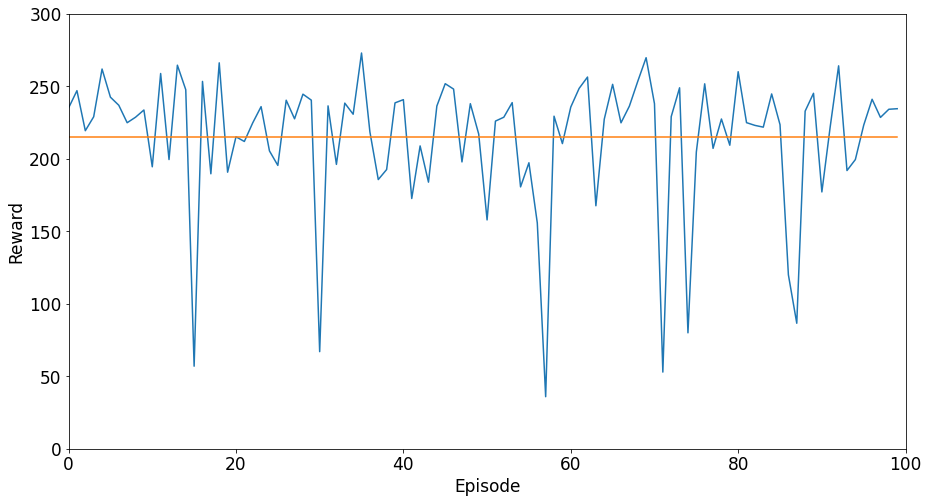

In [ ]:
plot_df2(pd.DataFrame(test_rewards), "Figure 2: Reward for each testing episode","Reward for each testing episode", "Episode", "Reward")

# Rewards

In [ ]:
import pandas as pd
test_rewards = pickle.load(open("saved_modelstest_rewards.p", "rb"))
test_df = pd.DataFrame(test_rewards)

In [ ]:
test_df

0
0   235.127812
1   247.052857
2   219.434538
3   229.052043
4   261.983364
..         ...
95  223.283331
96  241.125642
97  228.604624
98  234.227022
99  234.607915

[100 rows x 1 columns]

In [ ]:
test_df.rename(columns={0: 'Rewards'}, inplace=True)
test_df

Rewards
0   235.127812
1   247.052857
2   219.434538
3   229.052043
4   261.983364
..         ...
95  223.283331
96  241.125642
97  228.604624
98  234.227022
99  234.607915

[100 rows x 1 columns]

In [ ]:
test_df['Rewards'].mean()

214.81522602987036

###Overall, the model is very good and has a high average reward of about 214



In [ ]:
test_df['Rewards'].max()

273.0312018350793

In [ ]:
max = test_df['Rewards'].max()

In [ ]:
max

273.0312018350793

In [ ]:
test_df.loc[lambda test_df: test_df['Rewards'] == max]

Rewards
35  273.031202

### Episode 35 has the highest reward of about 273

## Videos

In [ ]:
env = gym.make('LunarLander-v2')
env.seed(21)
np.random.seed(21)

In [ ]:
from google.colab import drive
drive.mount('/content/Lunar')

Mounted at /content/Lunar


## No training at all

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./oldvideos/rl-video-episode-0.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Without complete training

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./oldvideos/rl-video-episode-27.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./oldvideos/rl-video-episode-16.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./oldvideos/rl-video-episode-64.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## After completetion of training and testing

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./Lunarfinal/rl-video-episode-0.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./Lunarfinal/rl-video-episode-10.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./Lunarfinal/rl-video-episode-20.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./Lunarfinal/rl-video-episode-30.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./Lunarfinal/rl-video-episode-40.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./Lunarfinal/rl-video-episode-50.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./Lunarfinal/rl-video-episode-60.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./Lunarfinal/rl-video-episode-70.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./Lunarfinal/rl-video-episode-80.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./Lunarfinal/rl-video-episode-90.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./Lunarfinal/rl-video-episode-100.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 height = 400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)